## 06. PYTHON資料分析與視覺化繪圖 II - Panadas & Matplotlib

### Pandas

* Series: 類似於一維數組的對象，它由一組數據（各種NumPy數據類型）以及一組與之相關的數據標籤（即索引）組成
* Dataframe : 表格型的數據結構，它含有一組有序的列，每列可以是不同的值類型

#### 安裝套件

* Python 2+ : pip install pandas
* Python 3+ : pip3 install pandas

#### 引用套件

In [1]:
import pandas as pd

#### Series

In [2]:
#from pandas import Series
import pandas as pd

obj = pd.Series([5,10,-10,20])
print(obj)
print(obj.values)
print(obj.index)

0     5
1    10
2   -10
3    20
dtype: int64
[  5  10 -10  20]
RangeIndex(start=0, stop=4, step=1)


In [3]:
#給定索引
obj2 = pd.Series([10, 20, -5, 30], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)
print(obj2['a'])
print(obj2[['a','c']])

d    10
b    20
a    -5
c    30
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')
-5
a    -5
c    30
dtype: int64


In [4]:
# Ditctionary 轉化 
sdata = {'Ohio': 15000, 'Texas': 21000, 'Oregon': 16000, 'Utah': 5000}
print(type(sdata))
obj3 = pd.Series(sdata)
print(obj3)

<class 'dict'>
Ohio      15000
Oregon    16000
Texas     21000
Utah       5000
dtype: int64


In [5]:
# List轉化
states = ['California', 'Ohio', 'Oregon', 'Texas']
print(type(states))
obj4 = pd.Series(sdata, index=states)
print(obj4)
print(pd.isnull(obj4))

<class 'list'>
California        NaN
Ohio          15000.0
Oregon        16000.0
Texas         21000.0
dtype: float64
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [6]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          15000.0
Oregon        16000.0
Texas         21000.0
Name: population, dtype: float64

In [7]:
#使用布林遮罩來取值
obj2 = pd.Series([10, 20, -5, 30], index=['d', 'b', 'a', 'c'])
print(obj2[obj2>0])
print(obj2[obj2>0]*2)
obj2[obj2<0] = 0
print(obj2)

# 依照index排序
print(obj2.sort_index())

#依照數值排序
print(obj2.sort_values())

d    10
b    20
c    30
dtype: int64
d    20
b    40
c    60
dtype: int64
d    10
b    20
a     0
c    30
dtype: int64
a     0
b    20
c    30
d    10
dtype: int64
a     0
d    10
b    20
c    30
dtype: int64


#### DataFrame

In [8]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = pd.DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [9]:
frame = pd.DataFrame(data,columns=['year','pop','state','debt'],index=['one','two','three','four','five'])
frame
frame.columns
frame['year']
frame.year
frame.loc['two']
#del frame['debt']
frame

,year,pop,state,debt
one,2000,1.5,Ohio,NaN
two,2001,1.7,Ohio,NaN
three,2002,3.6,Ohio,NaN
four,2001,2.4,Nevada,NaN
five,2002,2.9,Nevada,NaN


##### 讀取MysQL資料庫

In [10]:
import MySQLdb
conn = MySQLdb.Connect(host="localhost",user = "root",passwd ="user",db="Demo",charset="utf8")
sql = "SELECT * FROM EMPLOYEE"
df = pd.read_sql_query(sql,con=conn)
df

,ID,FIRST_NAME,LAST_NAME,AGE,SEX,INCOME,COUNTRY
0,1,Nick,Lin,35,M,80000.0,Taichung
1,2,Nick,Lin,35,M,80000.0,Taichung


In [11]:
df['FIRST_NAME']
#df.loc[2]
#df.loc[2]['INCOME']

0    Nick
1    Nick
Name: FIRST_NAME, dtype: object

##### 讀取CSV檔案

* 資料來源 :gapminder.csv
* 紀錄 142 個國家 1952 至 2007 年每五年的資訊

In [12]:
import pandas as pd

csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)

##### Gapminder資料分析

In [13]:
#顯示型態 - type()

print(type(gapminder))
print(type(gapminder['country']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
# 顯示前 N 筆資料 - head(N) , 預設N為前五筆
gapminder.head()
#gapminder.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
# 顯示後 N 筆資料 - tail(N), 預設 N 為 五筆
gapminder.tail()
#gapminder.tail(10)

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [16]:
#顯示欄位- DataFrame.columns()

gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [17]:
#顯示列欄數- DataFrame.shape()
gapminder.shape

(1704, 6)

In [18]:
#顯示列索引資訊- DataFrame.index()
gapminder.index

RangeIndex(start=0, stop=1704, step=1)

In [19]:
#顯示詳細資訊- DataFrame.info()

gapminder.info()
#gapminder.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [20]:
#顯示各變數描述統計資訊- DataFrame.describe()

gapminder.describe()
#gapminder['gdpPercap'].describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [21]:
#顯示特定欄位資料
gapminder[['country']]
#gapminder[['country', 'continent']]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [22]:
#條件查詢,找尋Taiwan資料

gapminder[gapminder['country'] == 'Taiwan']

#gapminder[gapminder['country'] == 'Taiwan'][['country', 'continent','year','pop']]

,country,continent,year,lifeExp,pop,gdpPercap
1500,Taiwan,Asia,1952,58.50,8550362,1206.947913
1501,Taiwan,Asia,1957,62.40,10164215,1507.861290
1502,Taiwan,Asia,1962,65.20,11918938,1822.879028
1503,Taiwan,Asia,1967,67.50,13648692,2643.858681
1504,Taiwan,Asia,1972,69.39,15226039,4062.523897
1505,Taiwan,Asia,1977,70.59,16785196,5596.519826
1506,Taiwan,Asia,1982,72.16,18501390,7426.354774
1507,Taiwan,Asia,1987,73.40,19757799,11054.561750
1508,Taiwan,Asia,1992,74.26,20686918,15215.657900
1509,Taiwan,Asia,1997,75.25,21628605,20206.820980


In [23]:
# 新增欄位

gapminder['country_abb'] = gapminder['country'].apply(lambda x: x[:3])
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,Afg
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,Afg
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,Afg
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,Afg
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,Afg
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,Afg


In [24]:
# 刪除欄位
# dataframe.drop() : axis = 0 表示要刪除觀測值（row），axis = 1 表示要刪除欄位（column）。

gapminder = gapminder.drop(0,axis=0)
#gapminder = gapminder.drop('country_abb',axis=1)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,Afg
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,Afg
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,Afg
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,Afg
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,Afg
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,Afg


In [25]:
# 資料加總 -- .sum()

gapminder[gapminder['year'] == 2007][['pop']].sum()


pop    6251013179
dtype: int64

In [26]:
# 計算資料平均值-- .mean()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mean()

lifeExp         67.007423
gdpPercap    11680.071820
dtype: float64

In [27]:
# 計算資料最大值-- .max()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].max()

lifeExp         82.60300
gdpPercap    49357.19017
dtype: float64

In [28]:
# 計算資料最小值-- .min()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].min()

lifeExp       39.613000
gdpPercap    277.551859
dtype: float64

In [29]:
# 計算資料標準差-- .std()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].std()

lifeExp         12.073021
gdpPercap    12859.937337
dtype: float64

In [30]:
# 計算資料中位數-- .median()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].median()

lifeExp        71.935500
gdpPercap    6124.371109
dtype: float64

In [31]:
# 計算資料分位數-- .quantile()
# 計算分位數時，如果資料中有包含 NA，則會自動忽略此筆資料。
# 例如有 10 筆資料，其中一筆為 NA，則計算時只會拿 9 筆資料來計算分位數。

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].quantile()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].quantile(q=[0.25, 0.5, 0.75])

,lifeExp,gdpPercap
0.25,57.16025,1624.842248
0.50,71.93550,6124.371109
0.75,76.41325,18008.835640


In [32]:
# 計算資料眾數-- .mode()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mode()

,lifeExp,gdpPercap
0,39.613,277.551859
1,42.082,414.507341
2,42.384,430.070692
3,42.568,469.709298
4,42.592,579.231743
5,42.731,619.676892
6,43.487,641.369524
7,43.828,690.805576
8,44.741,706.016537
9,45.678,752.749726


In [33]:
# 計算欄位之間的線性關係強度和方向 -- .corr()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap','pop']].corr()

,lifeExp,gdpPercap,pop
lifeExp,1.000000,0.678662,0.047553
gdpPercap,0.678662,1.000000,-0.055676
pop,0.047553,-0.055676,1.000000


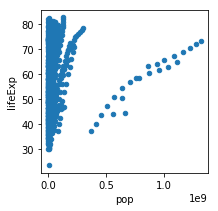

In [37]:
gapminder.plot(x='pop', y='lifeExp', kind='scatter', figsize=(3,3))

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(gapminder.corr(), annot=True, annot_kws={'fontsize': 12}, linewidths=.1, ax=ax)


ImportError: No module named 'seaborn'

In [43]:
# 資料排序 -- sort_values()
gapminder.sort_values(axis=0, by='pop', ascending=False, na_position='first', inplace=True)


In [44]:
display(gapminder.loc[:, ['country','year','pop']].tail(10))

,country,year,pop
1302,Sao Tome and Principe,1982,98593
422,Djibouti,1962,89898
1301,Sao Tome and Principe,1977,86796
1300,Sao Tome and Principe,1972,76595
421,Djibouti,1957,71851
1299,Sao Tome and Principe,1967,70787
1298,Sao Tome and Principe,1962,65345
420,Djibouti,1952,63149
1297,Sao Tome and Principe,1957,61325
1296,Sao Tome and Principe,1952,60011


### 資料繪圖 - Matplotlib

說明 : https://matplotlib.org/

#### 安裝套件
* Python 2+ : pip install matplotlib
* Python 3+ : pip3 install matplotlib

#### 引用套件

In [45]:
import matplotlib
import matplotlib.pyplot as plt

#### 折線圖

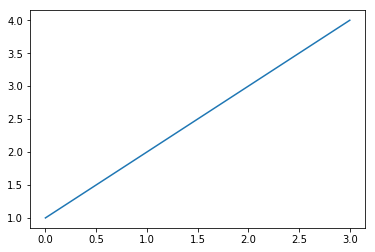

In [46]:
import matplotlib.pyplot as plt
X = [1,2,3,4]
plt.plot(X) 
plt.show()

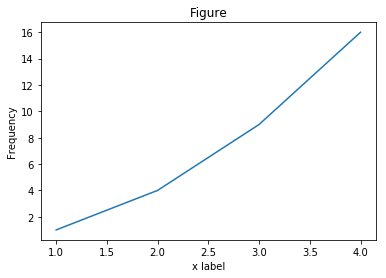

In [47]:
X = [1,2,3,4]
Y = [1,4,9,16]
plt.plot(X,Y)
plt.ylabel('Frequency')
plt.xlabel('x label')
plt.title('Figure')
plt.show()


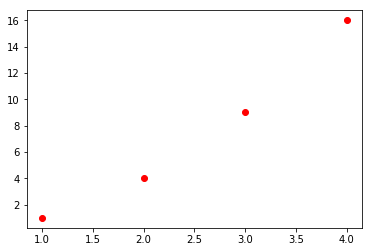

In [48]:
plt.plot(X,Y,'ro')

#### 長條圖

<BarContainer object of 4 artists>

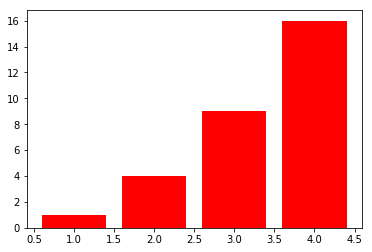

In [49]:
import matplotlib.pyplot as plt
X = [1,2,3,4]
Y = [1,4,9,16]
plt.bar(X,Y,color="red")

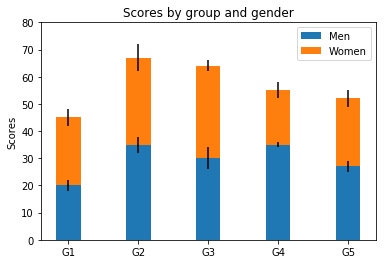

In [50]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#### 散佈圖

Text(0.5, 1.0, 'Figure')

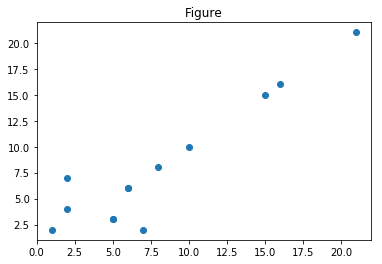

In [51]:
import matplotlib.pyplot as plt
X = [1,5,2,6,2,5,7,10,15,6,8,21,16]
Y = [2,3,4,6,7,3,2,10,15,6,8,21,16]
plt.scatter(X,Y)
plt.title('Figure')

#### 圓餅圖

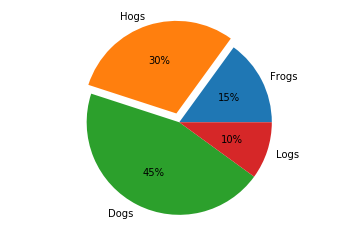

In [52]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

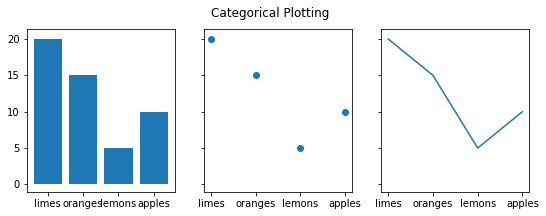

In [53]:
import matplotlib.pyplot as plt

data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

## 07自動化爬蟲 BeautifulSoup & Selenium

### 網頁解析 & 自動化測試套件
* Beautiful Soup
* Selenium

### Beautiful Soup

#### 安裝套件
* Python 2+ : pip install beautifulsoup4
* Python 3+ : pip3 install beautifulsoup4

#### 引用 Beautiful Soup 模組

In [54]:
from bs4 import BeautifulSoup

#### 使用Beautiful Soup 解析網頁

In [55]:
html_doc = """
<html><head><title>Hello World</title>

<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>

</head>
<body><h2>Test Header</h2>
<p>This is a test.</p>
<a id="link1" href="https://www.google.com.tw"> Google網站</a>
<a id="link2" class="large" href="https://www.facebook.com.tw">FaceBook</a>
<p>Hello, <b id="link1" class="boldtext">Bold Text</b></p>
</body></html>
"""

In [56]:
# 以 Beautiful Soup 解析 HTML 程式碼

soup = BeautifulSoup(html_doc, 'html.parser')
#soup = BeautifulSoup(open('data/A.html'), 'html.parser')

In [57]:
#將soup物件美化
print(soup.prettify())

<html>
 <head>
  <title>
   Hello World
  </title>
  <style>
   .large {
      color:blue;
      text-align: center;
    }
  </style>
 </head>
 <body>
  <h2>
   Test Header
  </h2>
  <p>
   This is a test.
  </p>
  <a href="https://www.google.com.tw" id="link1">
   Google網站
  </a>
  <a class="large" href="https://www.facebook.com.tw" id="link2">
   FaceBook
  </a>
  <p>
   Hello,
   <b class="boldtext" id="link1">
    Bold Text
   </b>
  </p>
 </body>
</html>



In [58]:
soup.html

<html><head><title>Hello World</title>
<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>
</head>
<body><h2>Test Header</h2>
<p>This is a test.</p>
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
<p>Hello, <b class="boldtext" id="link1">Bold Text</b></p>
</body></html>

#### 解析網頁結構

In [59]:
# Head tag

In [60]:
soup.head

<head><title>Hello World</title>
<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>
</head>

In [61]:
soup.head.text

'Hello World\n\n    .large {\n      color:blue;\n      text-align: center;\n    }\n\n'

In [62]:
# Title tag

In [63]:
soup.title

<title>Hello World</title>

In [64]:
soup.title.text
#soup.title.string

'Hello World'

In [65]:
# body tag 
soup.body

<body><h2>Test Header</h2>
<p>This is a test.</p>
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
<p>Hello, <b class="boldtext" id="link1">Bold Text</b></p>
</body>

In [66]:
soup.body.text

'Test Header\nThis is a test.\n Google網站\nFaceBook\nHello, Bold Text\n'

In [67]:
soup.body.a['href']

'https://www.google.com.tw'

In [68]:
# a tag 
soup.a

<a href="https://www.google.com.tw" id="link1"> Google網站</a>

In [69]:
soup.a.text
#soup.a.string

' Google網站'

In [70]:
soup.a['href']

'https://www.google.com.tw'

In [71]:
# p tag 
soup.p

<p>This is a test.</p>

In [72]:
soup.p.text
#soup.p.string

'This is a test.'

In [73]:
#.contents 属性可將tag的子節點以列表方式输出
print(soup.head.contents)

print(len(soup.head.contents))

for item in soup.head.contents:
    print(item)

[<title>Hello World</title>, '\n', <style>
    .large {
      color:blue;
      text-align: center;
    }
</style>, '\n']
4
<title>Hello World</title>


<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>




In [74]:
#.children 訪問子節點
for item in soup.head.children:
    print(item)

<title>Hello World</title>


<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>




In [75]:
#.children 訪問子節點
for item in soup.head.children:
    print(item)

<title>Hello World</title>


<style>
    .large {
      color:blue;
      text-align: center;
    }
</style>




In [76]:
print(soup.title.string)

print(soup.title.string.parent)

Hello World
<title>Hello World</title>


In [77]:
#.next_sibling 和 .previous_sibling 属性来訪問同一層兄弟節點
print(soup.body)
print("-----")
print(soup.body.p)
print("-----")

body = soup.body
print(body.p)
print(body.p.next_sibling)
print(body.p.next_sibling.next_sibling)
print(body.p.next_sibling.next_sibling.previous_sibling.previous_sibling)

<body><h2>Test Header</h2>
<p>This is a test.</p>
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
<p>Hello, <b class="boldtext" id="link1">Bold Text</b></p>
</body>
-----
<p>This is a test.</p>
-----
<p>This is a test.</p>


<a href="https://www.google.com.tw" id="link1"> Google網站</a>
<p>This is a test.</p>


In [78]:
#取得網頁所有文字內容
print(soup.getText())


Hello World

    .large {
      color:blue;
      text-align: center;
    }


Test Header
This is a test.
 Google網站
FaceBook
Hello, Bold Text




In [79]:
for string in soup.strings:
    print(string)
    #print(repr(string))



Hello World



    .large {
      color:blue;
      text-align: center;
    }





Test Header


This is a test.


 Google網站


FaceBook


Hello, 
Bold Text






In [80]:
# .stripped_strings 可以移除多餘的空白内容:
for string in soup.stripped_strings:
    print(string)
    #print(repr(string))

Hello World
.large {
      color:blue;
      text-align: center;
    }
Test Header
This is a test.
Google網站
FaceBook
Hello,
Bold Text


#### 搜尋單一節點

In [81]:
#搜尋節點 by tag
a_tag = soup.find('a')
print(a_tag.text)
print(a_tag['href'])
print(a_tag.get('href')) # .get(attribute's name) 取得tag 屬性內容

 Google網站
https://www.google.com.tw
https://www.google.com.tw


In [82]:
#搜尋節點 by tag ,tag id
a_tag = soup.find(name ='a',attrs={"id":"link2"})
#a_tag = soup.find('a',{'id':"link2"})
print(a_tag.text)

FaceBook


In [83]:
#搜尋節點 by tag ,class name
a_tag = soup.find(name ='a',attrs={"class":"large"})
#a_tag = soup.find('a',{'class':"large"})
#a_tag = soup.find('a','large')

print(a_tag.text)
print(a_tag['href'])
print(a_tag['class'])

FaceBook
https://www.facebook.com.tw
['large']


In [84]:
tags = soup.find(["a", "b"]) #只會找到第一個符合的節點 
print(tags)

<a href="https://www.google.com.tw" id="link1"> Google網站</a>


#### 搜尋節點

In [85]:
#搜尋節點
a_tags = soup.find_all('a')
for tag in a_tags:
    print(tag.text)
    print(tag['href'])

 Google網站
https://www.google.com.tw
FaceBook
https://www.facebook.com.tw


In [86]:
#取出節點屬性
for tag in a_tags:
    print(tag.get('href'))
    print(tag.get('class'))

https://www.google.com.tw
None
https://www.facebook.com.tw
['large']


In [87]:
# 搜尋所有超連結與粗體字
tags = soup.find_all(["a", "b"])
print(tags)

for tag in tags:
    print(tag)
    print(tag.text)
    print(tag.get('href'))

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>, <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>, <b class="boldtext" id="link1">Bold Text</b>]
<a href="https://www.google.com.tw" id="link1"> Google網站</a>
 Google網站
https://www.google.com.tw
<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>
FaceBook
https://www.facebook.com.tw
<b class="boldtext" id="link1">Bold Text</b>
Bold Text
None


In [88]:
# 限制搜尋結果數量
tags = soup.find_all(["a", "b"], limit=2)
print(tags)

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>, <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]


#### Select 選擇器

In [89]:
soup.select("title")

[<title>Hello World</title>]

In [90]:
soup.select("body a")

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>,
 <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [91]:
# Select by css name 
soup.select(".large")

[<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [92]:
soup.select("a.large")

[<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [93]:
# Select by id 
soup.select("#link1")

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>,
 <b class="boldtext" id="link1">Bold Text</b>]

In [94]:
soup.select("a#link1")

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>]

In [95]:
#依據屬性來選擇
soup.select('a[href]')

[<a href="https://www.google.com.tw" id="link1"> Google網站</a>,
 <a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [96]:
soup.select('a[class]')

[<a class="large" href="https://www.facebook.com.tw" id="link2">FaceBook</a>]

In [97]:
soup.select('a[style]')

[]

In [98]:
### Example-1 抓取蘋果新聞清單

In [99]:
import requests
from bs4 import BeautifulSoup

domainurl='http://www.appledaily.com.tw/realtimenews/section/new/'

res = requests.get(domainurl)
soup = BeautifulSoup(res.text)

#print (soup)

for news in soup.select('.rtddt'):
        link = news.select('a')[0]['href']
        Type = news.select('h2')[0].text
        Title = news.select('h1')[0].text
        print (Type, Title)
        print (link)

社會 【汐止勇警】蛇行害警摔斷魂　無照毒蟲現身...
https://tw.news.appledaily.com/local/realtime/20190829/1624584/
社會 【獨家】蕭薔哥哥砸電腦打傷女同事　被控訴...
https://tw.news.appledaily.com/local/realtime/20190829/1624601/
社會 【蘋果直擊】核四廠240束燃料棒　趁夜運...
https://tw.news.appledaily.com/local/realtime/20190829/1624526/
國際 正妹DJ抱嬰慘遭惡夫家暴　武術無影腳全上...
https://tw.news.appledaily.com/international/realtime/20190829/1624560/
社會 男不爽遭告遷怒警　「干你屁事」嗆警不算侮...
https://tw.news.appledaily.com/local/realtime/20190829/1624628/
財經 高雄加工區核准廠商進駐　創造300名就業...
https://tw.finance.appledaily.com/realtime/20190829/1624860/
地產 ​8月房市　全台小幅月減2%
https://tw.finance.appledaily.com/realtime/20190829/1624841/
政治 屏東枋寮鄉政顧問遊港失聯9天　疑拍攝解放...
https://tw.news.appledaily.com/politics/realtime/20190829/1624820/
生活 台上空現不穩定「徵兆」　南高屏等7縣市大...
https://tw.news.appledaily.com/life/realtime/20190829/1624575/
體育 【MLB】柯爾單場14K　單季雙位數奪三...
https://tw.sports.appledaily.com/realtime/20190829/1624683/
生活 最快十月上路！拉國際旅客遊花東　觀光局減...
https://tw.news.appledaily.com/life/realtime/20190829/1624849/
財經 馬雲再出狂言

####  Example-2 抓取蘋果新聞內文

In [102]:
import requests
from bs4 import BeautifulSoup

domainurl='https://tw.news.appledaily.com/local/realtime/20190829/1624608/'

res = requests.get(domainurl)
soup = BeautifulSoup(res.text)

#print (soup)

title = soup.select('article.ndArticle_leftColumn h1')[0].text
content = soup.select('article.ndArticle_content div.ndArticle_margin p')[0].text
print(title)
print(content)

吳子嘉慘了！爆韓國瑜私生女卻拿不出證據　今遭起訴
《美麗島電子報》董事長吳子嘉日前爆料指稱高雄市長韓國瑜曾與一名「王小姐」有段10年婚外情，還生下一女，引發軒然大波，韓認為爆料不實，5月底親赴北檢控告吳子嘉誹謗，台北地檢署調查後，傳訊多名吳子嘉提供的證人，但這些證人出庭都否認有跟他說過私生女的事，再加上被影射的「新莊王小姐」出庭，拿出親子鑑定報告，證明孩子的爸爸根本不是韓國瑜，檢方因此認定吳子嘉爆料不實，又拿不出更多證據，今依誹謗罪將吳子嘉起訴。 吳子嘉今年5月間向媒體和Youtube節目《吳董談大選》爆料，指稱韓國瑜和住新莊的王小姐有婚外情，又說兩人有私生女，吳稱：「新莊的王小姐跟韓國瑜在一起十幾年了，也生了一個小孩。據我所知是一個女孩，大概十來歲，韓當選市長後還找親信黃文財付王小姐數千萬元生活費。」還指韓國瑜透過親信交給王女數千萬元現金作為生活費。吳子嘉為其他案件出庭時，又加碼爆料指稱去年7、8月市長選舉期間，「韓國瑜一直安排王小姐出國，但王小姐不願意。」還說：「王小姐是台南人，韓國瑜在市長選舉期間有去台南參加王小姐家人的喪禮。」 對於吳子嘉的爆料，韓國瑜終於忍無可忍，於5月31日親赴北檢控告吳子嘉誹謗：「吳子嘉董事長有責任拿出證據來向社會說明，孩子在哪裡？錢在哪裡？多少錢？如何送？都要交代清楚。」還痛批吳子嘉：「從去年選高雄市長到現在，我一直被黑、被中傷、被造謠、被傷害等，我從沒提告，但吳子嘉講到我在外面有小孩，又有送錢過去，找黃文財去送了一大筆錢，我必須請求檢察官出面幫我主持公道。」檢方調查時，將吳子嘉所提供的所有消息來源，都以證人身分傳喚到案，但證人都否認曾和吳說過韓國瑜私生女之事，而被影射的「新莊王小姐」，檢方也有傳喚，她出具一份自己小孩的親子鑑定報告，證明小孩是她與前夫所生，根本不是韓國瑜，這也被檢方列為重要證據。 檢方認為，吳子嘉的消息來源都否認提供私生女等訊息給吳，加上親子鑑定報告打臉吳子嘉，吳又提不出更多證據證明所言，因此檢方認為吳所言與事實不符，今將吳子嘉依誹謗罪起訴。（吳珮如／台北報導）【更多新聞，請看《蘋果陪審團》粉絲團】出版時間：10:03更新時間：14:48(更新：調查內容)


#### Example-3 抓取蘋果新聞清單列表,內文並儲存至資料庫

In [103]:
import pymongo
import requests
from bs4 import BeautifulSoup


def getContent(link):
    res = requests.get(link)
    soup = BeautifulSoup(res.text)
    title = soup.select('article.ndArticle_leftColumn h1')[0].text
    content = soup.select('article.ndArticle_content div.ndArticle_margin p')[0].text
    #print(title)
    #print(content)
    return content

def insertDB(tag,title,link,content):
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient["Article"]
    mycol = mydb['AppleNews']
    mydict = { "tag": tag,"title":title,"link": link, "content":content } 
    x = mycol.insert_one(mydict) 
    print(x.inserted_id) 

domainurl='http://www.appledaily.com.tw/realtimenews/section/new/'

res = requests.get(domainurl)
soup = BeautifulSoup(res.text)


for news in soup.select('.rtddt'):
        link = news.select('a')[0]['href']
        tag= news.select('h2')[0].text
        title = news.select('h1')[0].text
        print (tag, title)
        print (link)
        content = getContent(link)
        insertDB(tag,title,link,content)

社會 【汐止勇警】蛇行害警摔斷魂　無照毒蟲現身...
https://tw.news.appledaily.com/local/realtime/20190829/1624584/
5d6778c45f627d139e7c36c2
社會 【獨家】蕭薔哥哥砸電腦打傷女同事　被控訴...
https://tw.news.appledaily.com/local/realtime/20190829/1624601/
5d6778c75f627d139e7c36c4
社會 【蘋果直擊】核四廠240束燃料棒　趁夜運...
https://tw.news.appledaily.com/local/realtime/20190829/1624526/
5d6778c95f627d139e7c36c6
國際 正妹DJ抱嬰慘遭惡夫家暴　武術無影腳全上...
https://tw.news.appledaily.com/international/realtime/20190829/1624560/
5d6778cc5f627d139e7c36c8
社會 男不爽遭告遷怒警　「干你屁事」嗆警不算侮...
https://tw.news.appledaily.com/local/realtime/20190829/1624628/
5d6778cc5f627d139e7c36ca
財經 高雄加工區核准廠商進駐　創造300名就業...
https://tw.finance.appledaily.com/realtime/20190829/1624860/
5d6778cc5f627d139e7c36cc
地產 ​8月房市　全台小幅月減2%
https://tw.finance.appledaily.com/realtime/20190829/1624841/
5d6778cf5f627d139e7c36ce
政治 屏東枋寮鄉政顧問遊港失聯9天　疑拍攝解放...
https://tw.news.appledaily.com/politics/realtime/20190829/1624820/
5d6778d05f627d139e7c36d0
生活 台上空現不穩定「徵兆」　南高屏等7縣市大...
https://tw.news.appledaily.com/life/realtime/2019

#### Example-4 抓取PTT文章內容及回文

In [108]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.ptt.cc/bbs/movie/M.1567054261.A.D63.html')
soup = BeautifulSoup(res.text)
mainContent = soup.find(name = 'div',attrs={"class":"bbs-screen bbs-content"})
#print(mainContent)
content = mainContent.text
print(content)

作者nanachi (上善若水)看板movie標題[討論] 韓國電影是不是在台灣逐漸佔上風了？時間Thu Aug 29 12:50:59 2019


最近幾年韓片已經打入台灣市場，且常有佳作，不僅口碑好

票房更佳，反觀日本電影越走越倒退，雖說有是枝裕和這樣

的優秀導演，可整體環境一攤死水，韓國電影未來發展可說

是無可限量，各位認為呢？
-----
Sent from JPTT on my iPhone

--
※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 223.137.29.34 (臺灣)
※ 文章網址: https://www.ptt.cc/bbs/movie/M.1567054261.A.D63.html
→ azoc245     : 樓下77508/29 12:52
→ hp8232      : 之前屍速列車上映時就有一波討論了08/29 12:53
推 CavendishJr : 你是想說在台灣市場還是亞洲?08/29 13:02
推 filmwalker  : 東南亞其實是對岸電影較吃香...08/29 13:05
噓 DKnex       : 台灣?亞洲? 能不能明確點 08/29 13:08
※ 編輯: nanachi (223.137.29.34 臺灣), 08/29/2019 13:11:02
推 ling7777777 : 改掉狗血煽情 自然一點 比較可以 08/29 13:26
推 Goei        : 日本電影就千篇一律的吶喊 飆淚 雅美爹  無聊死 08/29 13:28
推 sdfg014025xx: 日本的比台灣還讓人不想看 08/29 13:38
推 keny80206   : 日本還是做動畫就好 08/29 13:49
推 smallGY     : 日本就靠柯南 多啦A夢 七龍珠 這些再撐而已 08/29 13:50
→ smallGY     : 劇場版再戰20年 08/29 13:51
推 ejijo761115 : 每年固定看小新 柯南 多啦A夢劇場版 其他日本電影倒 08/29 13:59
→ ejijo761115 : 沒怎麼關注 除了山本美月 綾瀨遙 有參演的以外XD 08/29 13:59
推 qoo2002s    : 電影版推文大概也只看那些日本片而已啦 08/29 14:07
→ 

In [109]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.ptt.cc/bbs/movie/M.1567054261.A.D63.html')
soup = BeautifulSoup(res.text)
mainContent = soup.find(name = 'div',attrs={"class":"bbs-screen bbs-content"})
#print(mainContent)
content = mainContent.text
print(content)


board_meta = mainContent.find(name = 'div',attrs={"class":"article-metaline-right"})
#print(board_meta)
board_tag = board_meta.find(name = 'span',attrs={"class":"article-meta-tag"}).text
board_value = board_meta.find(name = 'span',attrs={"class":"article-meta-value"}).text
print(board_tag,board_value)

article_meta = mainContent.find_all(name = 'div',attrs={"class":"article-metaline"})

#get meta-data
for item in article_meta:
    meta_tag = item.find(name = 'span',attrs={"class":"article-meta-tag"}).text
    meta_value =  item.find(name = 'span',attrs={"class":"article-meta-value"}).text
    print(meta_tag,meta_value)
    
 
    
feebackList = mainContent.find_all(name = 'div',attrs={"class":"push"})
for feeback in feebackList:
     push_userId= feeback.find(name ='span',attrs={"class":"f3 hl push-userid"}).text
     push_content = feeback.find(name='span',attrs={"class":"f3 push-content"}).text
     push_time = feeback.find(name='span',attrs={"class":"push-ipdatetime"}).text
     print(push_userId,push_content,push_time )
    
for remove in mainContent(['span','div']):
     remove.decompose()

print(mainContent)

作者nanachi (上善若水)看板movie標題[討論] 韓國電影是不是在台灣逐漸佔上風了？時間Thu Aug 29 12:50:59 2019


最近幾年韓片已經打入台灣市場，且常有佳作，不僅口碑好

票房更佳，反觀日本電影越走越倒退，雖說有是枝裕和這樣

的優秀導演，可整體環境一攤死水，韓國電影未來發展可說

是無可限量，各位認為呢？
-----
Sent from JPTT on my iPhone

--
※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 223.137.29.34 (臺灣)
※ 文章網址: https://www.ptt.cc/bbs/movie/M.1567054261.A.D63.html
→ azoc245     : 樓下77508/29 12:52
→ hp8232      : 之前屍速列車上映時就有一波討論了08/29 12:53
推 CavendishJr : 你是想說在台灣市場還是亞洲?08/29 13:02
推 filmwalker  : 東南亞其實是對岸電影較吃香...08/29 13:05
噓 DKnex       : 台灣?亞洲? 能不能明確點 08/29 13:08
※ 編輯: nanachi (223.137.29.34 臺灣), 08/29/2019 13:11:02
推 ling7777777 : 改掉狗血煽情 自然一點 比較可以 08/29 13:26
推 Goei        : 日本電影就千篇一律的吶喊 飆淚 雅美爹  無聊死 08/29 13:28
推 sdfg014025xx: 日本的比台灣還讓人不想看 08/29 13:38
推 keny80206   : 日本還是做動畫就好 08/29 13:49
推 smallGY     : 日本就靠柯南 多啦A夢 七龍珠 這些再撐而已 08/29 13:50
→ smallGY     : 劇場版再戰20年 08/29 13:51
推 ejijo761115 : 每年固定看小新 柯南 多啦A夢劇場版 其他日本電影倒 08/29 13:59
→ ejijo761115 : 沒怎麼關注 除了山本美月 綾瀨遙 有參演的以外XD 08/29 13:59
推 qoo2002s    : 電影版推文大概也只看那些日本片而已啦 08/29 14:07
→ 

### Selenium

#### 安裝套件

* Python 2+ : pip install selenium
* Python 3+ : pip3 install selenium
* Install Chrome WebDriver : sudo apt-get install chromium-chromedriver

#### 引用套件

In [137]:
from selenium import webdriver

#### 啟動瀏覽器

In [138]:
driver = webdriver.Chrome()
#driver = webdriver.Chrome('/usr/lib/chromium-browser/chromedriver')

In [139]:
#設定視窗最大化
driver.maximize_window()

In [140]:
url = 'http://www.google.com'
driver.get(url)

In [141]:
#回傳目前的網址
driver.current_url

'https://www.google.com/?gws_rd=ssl'

In [142]:
# 網頁重新整理
driver.refresh()

In [143]:
# 儲存截圖 save_screenshot()
driver.save_screenshot('pic/screen.png')

False

In [144]:
driver.close() #關閉目前視窗
#driver.quit() #關閉所有視窗,並退出Driver

#### 元素定位

##### By id


In [135]:
# <div id="aaa">...</div>

In [136]:
driver.find_element_by_id("aaa")
driver.find_elements_by_id("aaa")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.ID, "aaa")
driver.find_elements(By.ID, "aaa")

##### By Class Name

In [145]:
#<div class="myclass">...</div>

In [ ]:
driver.find_element_by_class_name("myclass")
driver.find_elements_by_class_name("myclass")

In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.CLASS_NAME, "myclass")
driver.find_elements(By.CLASS_NAME, "myclass")

##### By Name

In [146]:
#<div name="abc">...</div>

In [147]:
driver.find_element_by_name("abc")
driver.find_elements_by_name("abc")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


In [148]:
from selenium.webdriver.common.by import By
driver.find_element(By.NAME, "abc")
driver.find_elements(By.NAME, "abc")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### By CSS

In [ ]:
#<div id="area"><span class="location">abc</span></div>

In [ ]:
driver.find_element_by_css_selector("#area span.location")
driver.find_elements_by_css_selector("#area span.location")

In [149]:
from selenium.webdriver.common.by import By
driver.find_element("#area span.location")
driver.find_elements("#area span.location")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### By Link Text

In [ ]:
#<a href="http://www.google.com/search?q=iphone">iphone</a>>

In [ ]:
driver.find_element_by_link_text("iphone")
driver.find_elements_by_link_text("iphone")

In [ ]:
from selenium.webdriver.common.by import By
driver.find_element(By.LINK_TEXT, "iphone")
driver.find_elements(BY.LINK_TEXT, "iphone")

##### By Partial Link Text

In [ ]:
#<a href="http://www.google.com/search?q=iphone">iphone</a>>

In [ ]:
driver.find_element_by_partial_link_text("phone")
driver.find_elements_by_partial_link_text("phone")

In [150]:
from selenium.webdriver.common.by import By
driver.find_element(By.PARTIAL_LINK_TEXT, "phone")
driver.find_elements(By.PARTIAL_LINK_TEXT, "phone")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### By XPATH

In [ ]:
#<input type="text" name="abc" />

In [ ]:
driver.find_element_by_xpath("//input")
driver.find_elements_by_xpath("//input")

In [151]:
from selenium.webdriver.common.by import By
driver.find_element(By.XPATH, "//input")
driver.find_elements(By.XPATH, "//input")

WebDriverException: Message: no such session
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


##### 常用Action
* send_keys('XXX') : 輸入框輸入內容
* click() : 點擊
* get_attribute(name) : 得到特定屬性的值
* clear() :清除輸入的內容
* location :回傳元素位置
* submit() : 提交內容 (Form)

##### Example 8591

In [192]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [193]:
driver = webdriver.Chrome()

In [194]:
driver.get('https://www.591.com.tw/')

In [195]:
driver.find_element_by_id('auto-search-input')

<selenium.webdriver.remote.webelement.WebElement (session="fc4172ba9cadbe23fd56eb7ddd66eb5b", element="0.08517587697375273-1")>

In [196]:
a = driver.find_element_by_id('auto-search-input')

In [197]:
a.get_attribute("class")

'auto-search-input ie-color'

In [198]:
a.location

{'x': 185, 'y': 280}

In [199]:
driver.find_element_by_id('auto-search-input').send_keys('竹東')

In [200]:
driver.find_element_by_id('auto-search-input').clear()

In [201]:

driver.find_element_by_id('auto-search-input').send_keys('竹北')

In [202]:
driver.find_element_by_id('auto-search-input').send_keys(Keys.ENTER)

In [203]:
driver.find_element_by_xpath('//*[@id="search-location"]/span[1]/i').click()

In [204]:
driver.find_element_by_link_text('新竹縣').click()

In [205]:
driver.find_element_by_xpath('//*[@id="optionBox"]/li[3]/label/span').click()

In [206]:
driver.find_element_by_xpath('//*[@id="optionBox"]/li[1]/label/span').click()

In [207]:
driver.find_element_by_link_text('獨立套房').click()

In [208]:
driver.find_element_by_xpath('//*[@id="search-price"]/span[3]').click()

In [209]:
driver.find_element_by_xpath('//*[@id="search-plain"]/span[2]').click()

In [210]:
print(driver.current_url)

https://rent.591.com.tw/?kind=2&type=1&region=5&rentprice=2&area=0,10


In [211]:
driver.find_element_by_partial_link_text('三民路').click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"partial link text","selector":"三民路"}
  (Session info: chrome=76.0.3809.100)
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)


In [212]:
target = driver.find_elements_by_partial_link_text('飯店')

In [213]:
for item in target :
    item.click()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=76.0.3809.100)
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.18362 x86_64)
